In [1]:
#First step is to load all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import os
import streamlit as st
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from imblearn.combine import SMOTEENN, SMOTETomek
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
# Location of the dataset folder
dataset_folder = "/Users/nehadudeja/Desktop/Dissertation project/pamap2+physical+activity+monitoring (1)/PAMAP2_Dataset/Protocol"

In [3]:
#List of the dataset files inside the folder
# Using List comprehension to load multiple files
dataset_files = [os.path.join(dataset_folder, f'subject10{i}.dat') for i in range(1, 10)]


In [4]:
dataset_files

['/Users/nehadudeja/Desktop/Dissertation project/pamap2+physical+activity+monitoring (1)/PAMAP2_Dataset/Protocol/subject101.dat',
 '/Users/nehadudeja/Desktop/Dissertation project/pamap2+physical+activity+monitoring (1)/PAMAP2_Dataset/Protocol/subject102.dat',
 '/Users/nehadudeja/Desktop/Dissertation project/pamap2+physical+activity+monitoring (1)/PAMAP2_Dataset/Protocol/subject103.dat',
 '/Users/nehadudeja/Desktop/Dissertation project/pamap2+physical+activity+monitoring (1)/PAMAP2_Dataset/Protocol/subject104.dat',
 '/Users/nehadudeja/Desktop/Dissertation project/pamap2+physical+activity+monitoring (1)/PAMAP2_Dataset/Protocol/subject105.dat',
 '/Users/nehadudeja/Desktop/Dissertation project/pamap2+physical+activity+monitoring (1)/PAMAP2_Dataset/Protocol/subject106.dat',
 '/Users/nehadudeja/Desktop/Dissertation project/pamap2+physical+activity+monitoring (1)/PAMAP2_Dataset/Protocol/subject107.dat',
 '/Users/nehadudeja/Desktop/Dissertation project/pamap2+physical+activity+monitoring (1)/P

In [5]:
columns = [
    'timestamp', 'activity_id', 'heart_rate',
    'hand_temperature',
    'hand_acceleration_16g_x', 'hand_acceleration_16g_y', 'hand_acceleration_16g_z',
    'hand_acceleration_6g_x', 'hand_acceleration_6g_y', 'hand_acceleration_6g_z',
    'hand_gyroscope_x', 'hand_gyroscope_y', 'hand_gyroscope_z',
    'hand_magnetometer_x', 'hand_magnetometer_y', 'hand_magnetometer_z',
    'hand_orientation_1', 'hand_orientation_2', 'hand_orientation_3', 'hand_orientation_4',
    'chest_temperature',
    'chest_acceleration_16g_x', 'chest_acceleration_16g_y', 'chest_acceleration_16g_z',
    'chest_acceleration_6g_x', 'chest_acceleration_6g_y', 'chest_acceleration_6g_z',
    'chest_gyroscope_x', 'chest_gyroscope_y', 'chest_gyroscope_z',
    'chest_magnetometer_x', 'chest_magnetometer_y', 'chest_magnetometer_z',
    'chest_orientation_1', 'chest_orientation_2', 'chest_orientation_3', 'chest_orientation_4',
    'ankle_temperature',
    'ankle_acceleration_16g_x', 'ankle_acceleration_16g_y', 'ankle_acceleration_16g_z',
    'ankle_acceleration_6g_x', 'ankle_acceleration_6g_y', 'ankle_acceleration_6g_z',
    'ankle_gyroscope_x', 'ankle_gyroscope_y', 'ankle_gyroscope_z',
    'ankle_magnetometer_x', 'ankle_magnetometer_y', 'ankle_magnetometer_z',
    'ankle_orientation_1', 'ankle_orientation_2', 'ankle_orientation_3', 'ankle_orientation_4'
]

In [6]:
len(columns)

54

In [7]:
# Loading and combining all the dataset files
data_list = []
for file in dataset_files:
    data = pd.read_csv(file, delim_whitespace=True, header=None)
    data_list.append(data)

all_data = pd.concat(data_list, ignore_index=True)
all_data.columns = columns

In [8]:
all_data

,timestamp,activity_id,heart_rate,hand_temperature,hand_acceleration_16g_x,hand_acceleration_16g_y,hand_acceleration_16g_z,hand_acceleration_6g_x,hand_acceleration_6g_y,hand_acceleration_6g_z,...,ankle_gyroscope_x,ankle_gyroscope_y,ankle_gyroscope_z,ankle_magnetometer_x,ankle_magnetometer_y,ankle_magnetometer_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.008300,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.006577,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.003014,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.003175,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,0.012698,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.037788,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.068904,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018
2872530,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.070888,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416
2872531,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,0.018961,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208


In [9]:
#The data having activity id=0 is not considered. This data mainly covers transient activities between performing different activities, e.g. going from one location to the next activity's location, or waiting for the preparation of some equipment
data = all_data[all_data['activity_id'] != 0] 
data

,timestamp,activity_id,heart_rate,hand_temperature,hand_acceleration_16g_x,hand_acceleration_16g_y,hand_acceleration_16g_z,hand_acceleration_6g_x,hand_acceleration_6g_y,hand_acceleration_6g_z,...,ankle_gyroscope_x,ankle_gyroscope_y,ankle_gyroscope_z,ankle_magnetometer_x,ankle_magnetometer_y,ankle_magnetometer_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
2928,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,1.000000,0.000000,0.000000,0.000000
2929,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,0.020882,0.000945,0.006007,-60.8916,-36.319700,-58.365600,1.000000,0.000000,0.000000,0.000000
2930,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,1.000000,0.000000,0.000000,0.000000
2931,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,1.000000,0.000000,0.000000,0.000000
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872015,95.06,24,NaN,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,...,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,0.522929,-0.291612,0.705786,-0.378648
2872016,95.07,24,NaN,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,...,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134,0.522880,-0.291694,0.705895,-0.378450
2872017,95.08,24,NaN,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,...,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,0.522625,-0.291978,0.706161,-0.378084
2872018,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,...,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,0.522536,-0.291955,0.706426,-0.377733


In [10]:
# Checking how many null values are there in the dataset
data.isnull().sum()

timestamp                         0
activity_id                       0
heart_rate                  1765464
hand_temperature              11124
hand_acceleration_16g_x       11124
hand_acceleration_16g_y       11124
hand_acceleration_16g_z       11124
hand_acceleration_6g_x        11124
hand_acceleration_6g_y        11124
hand_acceleration_6g_z        11124
hand_gyroscope_x              11124
hand_gyroscope_y              11124
hand_gyroscope_z              11124
hand_magnetometer_x           11124
hand_magnetometer_y           11124
hand_magnetometer_z           11124
hand_orientation_1            11124
hand_orientation_2            11124
hand_orientation_3            11124
hand_orientation_4            11124
chest_temperature              2420
chest_acceleration_16g_x       2420
chest_acceleration_16g_y       2420
chest_acceleration_16g_z       2420
chest_acceleration_6g_x        2420
chest_acceleration_6g_y        2420
chest_acceleration_6g_z        2420
chest_gyroscope_x           

In [11]:
# Handle missing values
data = data.dropna()

In [12]:
data

,timestamp,activity_id,heart_rate,hand_temperature,hand_acceleration_16g_x,hand_acceleration_16g_y,hand_acceleration_16g_z,hand_acceleration_6g_x,hand_acceleration_6g_y,hand_acceleration_6g_z,...,ankle_gyroscope_x,ankle_gyroscope_y,ankle_gyroscope_z,ankle_magnetometer_x,ankle_magnetometer_y,ankle_magnetometer_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1.000000,0.000000,0.000000,0.000000
2943,37.81,1,100.0,30.375,2.24615,7.48180,5.55219,2.25130,7.40595,5.65313,...,0.005819,-0.017912,0.015243,-60.7820,-36.211600,-58.489100,1.000000,0.000000,0.000000,0.000000
2954,37.92,1,100.0,30.375,2.30000,7.10681,6.09309,2.34613,7.46611,6.12103,...,0.015376,-0.011798,0.011387,-61.4531,-36.298300,-58.484500,1.000000,0.000000,0.000000,0.000000
2965,38.03,1,100.0,30.375,2.49455,7.52335,6.17157,2.59106,7.76653,6.27112,...,-0.012672,-0.009233,0.005823,-62.0065,-36.721700,-58.360800,1.000000,0.000000,0.000000,0.000000
2976,38.14,1,101.0,30.375,2.71654,8.30596,4.78671,2.59596,7.94641,4.86635,...,0.050959,-0.042562,-0.009289,-60.4311,-37.541200,-59.001300,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871975,94.66,24,162.0,25.125,4.78601,6.75444,7.05521,4.71052,6.72462,6.64876,...,-0.022888,0.020064,-0.022287,-46.0304,-1.464080,-0.453931,0.522578,-0.295758,0.700086,-0.386418
2871986,94.77,24,162.0,25.125,4.34732,6.90337,6.35537,4.39582,6.96850,6.61834,...,-0.002293,-0.004692,0.009044,-45.5269,-0.843791,0.114449,0.522768,-0.293886,0.701447,-0.385119
2871997,94.88,24,162.0,25.125,4.70704,6.59291,5.89995,4.70308,6.48243,5.99996,...,-0.029348,-0.020501,-0.036864,-45.6476,-1.094840,0.256148,0.522624,-0.294082,0.703224,-0.381912
2872007,94.98,24,162.0,25.125,4.81452,6.51482,5.74788,4.89736,6.49594,5.78832,...,-0.036682,-0.011895,-0.017897,-45.9167,-0.437698,0.254439,0.523382,-0.292121,0.704582,-0.379869


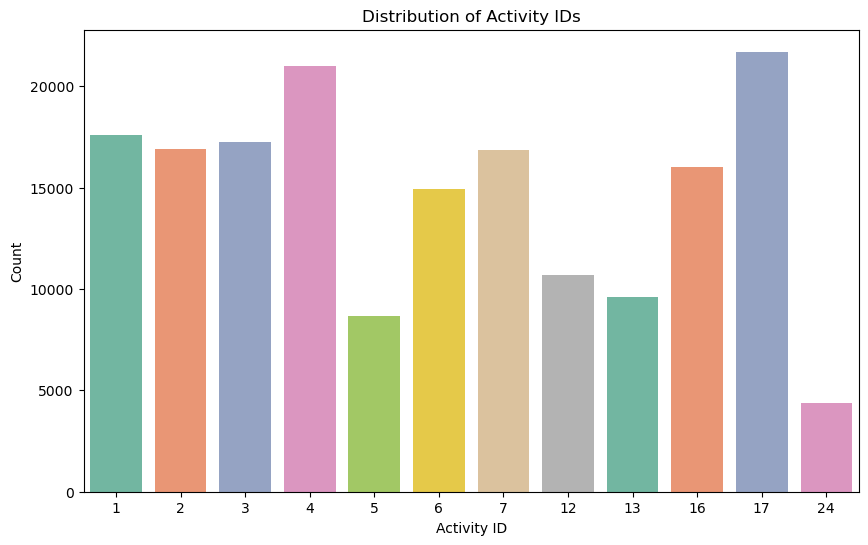

In [13]:
# Understanding the data through bar graph
# Plotting the distribution of target variable (Activity ID)
plt.figure(figsize=(10, 6))
sns.countplot(x='activity_id', data=data, palette='Set2')
plt.title('Distribution of Activity IDs')
plt.xlabel('Activity ID')
plt.ylabel('Count')
plt.show()

In [14]:
# Separating features and labels
X = data.drop(['timestamp', 'activity_id'], axis=1)
Y = data['activity_id']

In [15]:
# Mapping for activity IDs to activity names
activity_mapping = {
    0: "other (transient activities)",
    1: "lying",
    2: "sitting",
    3: "standing",
    4: "walking",
    5: "running",
    6: "cycling",
    7: "Nordic walking",
    9: "watching TV",
    10: "computer work",
    11: "car driving",
    12: "ascending stairs",
    13: "descending stairs",
    16: "vacuum cleaning",
    17: "ironing",
    18: "folding laundry",
    19: "house cleaning",
    20: "playing soccer",
    24: "rope jumping"
}


In [16]:
# Apply the activity mapping to the data
data['activity_name'] = data['activity_id'].map(activity_mapping)


In [17]:
#Analysing the information of the features of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175498 entries, 2932 to 2872018
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   timestamp                 175498 non-null  float64
 1   activity_id               175498 non-null  int64  
 2   heart_rate                175498 non-null  float64
 3   hand_temperature          175498 non-null  float64
 4   hand_acceleration_16g_x   175498 non-null  float64
 5   hand_acceleration_16g_y   175498 non-null  float64
 6   hand_acceleration_16g_z   175498 non-null  float64
 7   hand_acceleration_6g_x    175498 non-null  float64
 8   hand_acceleration_6g_y    175498 non-null  float64
 9   hand_acceleration_6g_z    175498 non-null  float64
 10  hand_gyroscope_x          175498 non-null  float64
 11  hand_gyroscope_y          175498 non-null  float64
 12  hand_gyroscope_z          175498 non-null  float64
 13  hand_magnetometer_x       175498 non-null  fl

In [18]:
# Analysing the data 
data["activity_name"].value_counts()

activity_name
ironing              21696
walking              20998
lying                17575
standing             17256
sitting              16881
Nordic walking       16857
vacuum cleaning      15997
cycling              14933
ascending stairs     10699
descending stairs     9585
running               8665
rope jumping          4356
Name: count, dtype: int64

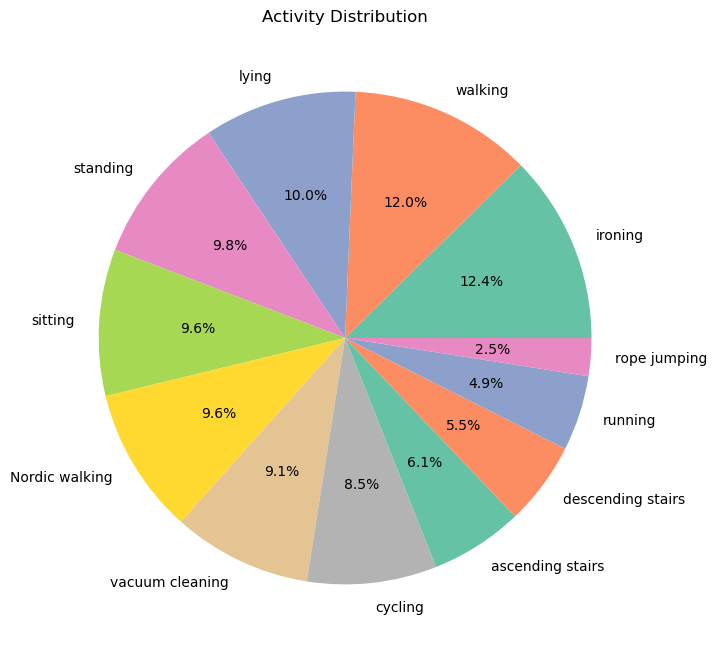

In [19]:
# Pie chart of activity distribution
activity_counts = data['activity_name'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Activity Distribution')
plt.show()

# We can observe that data is highly imbalance

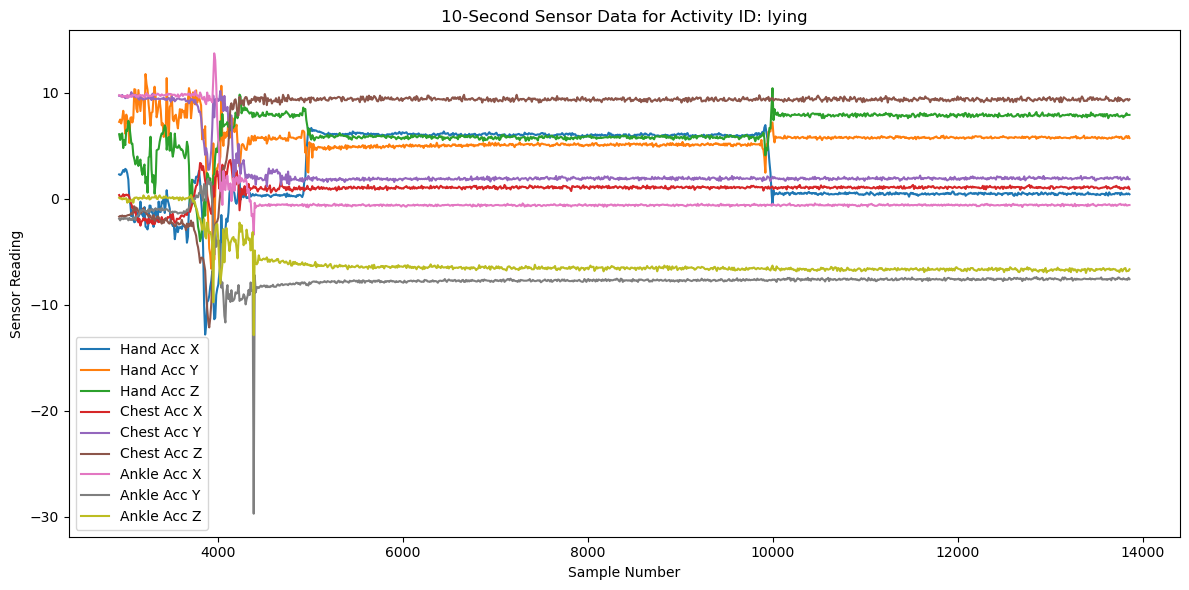

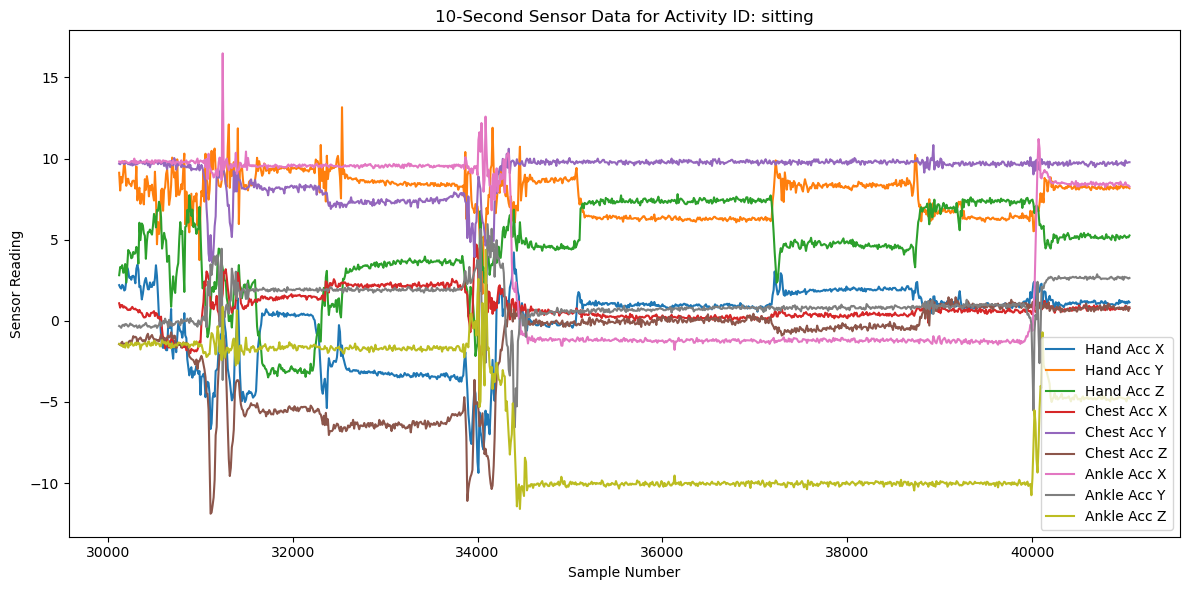

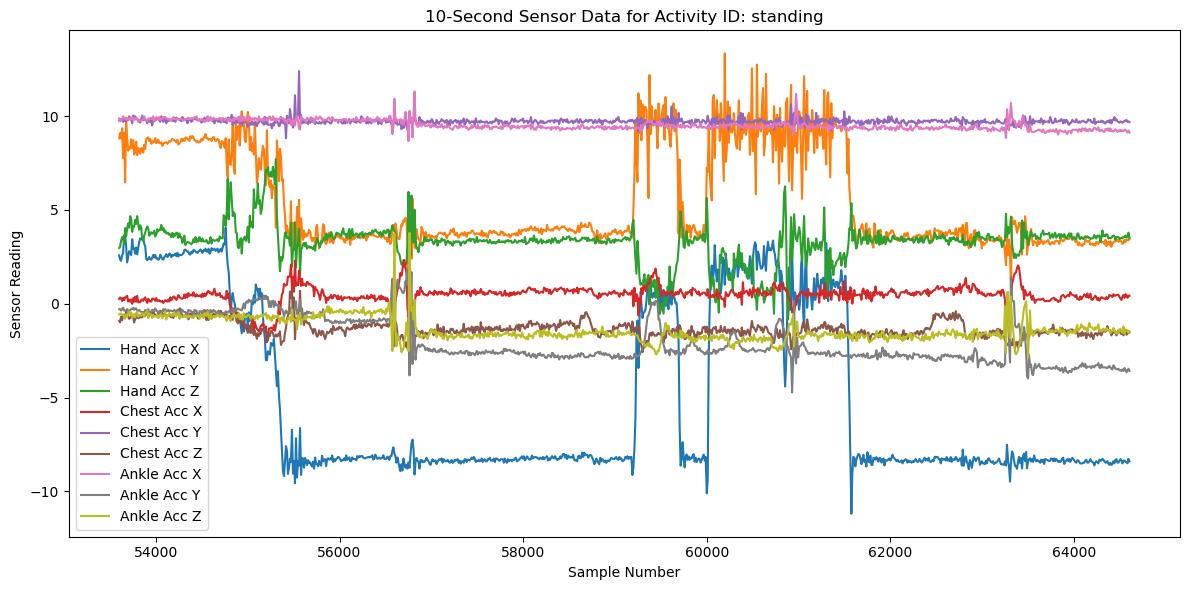

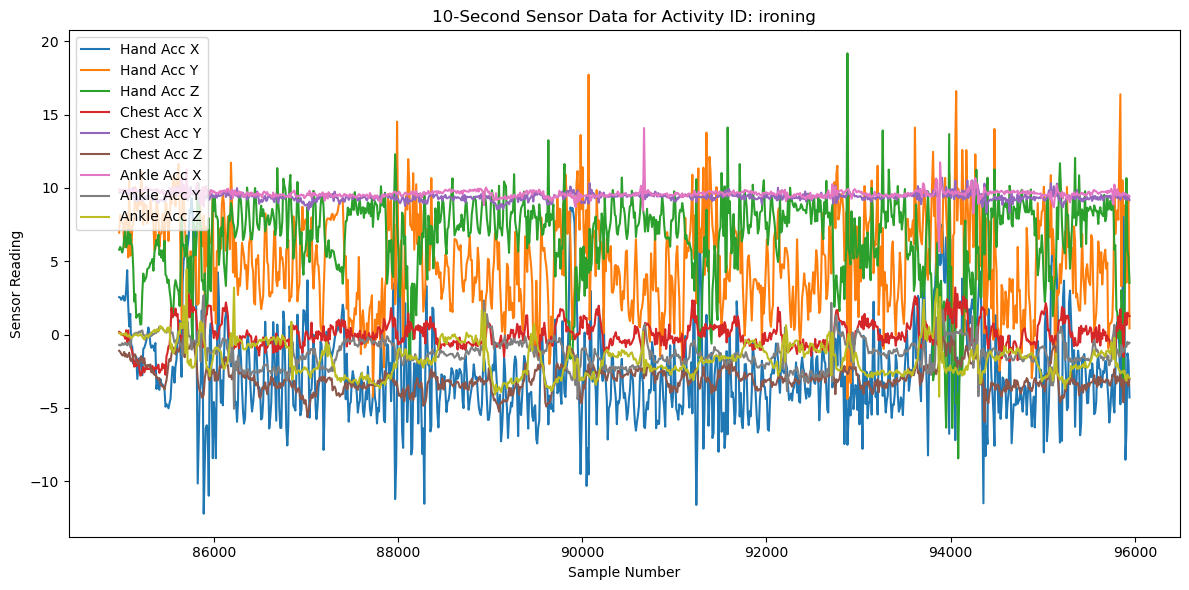

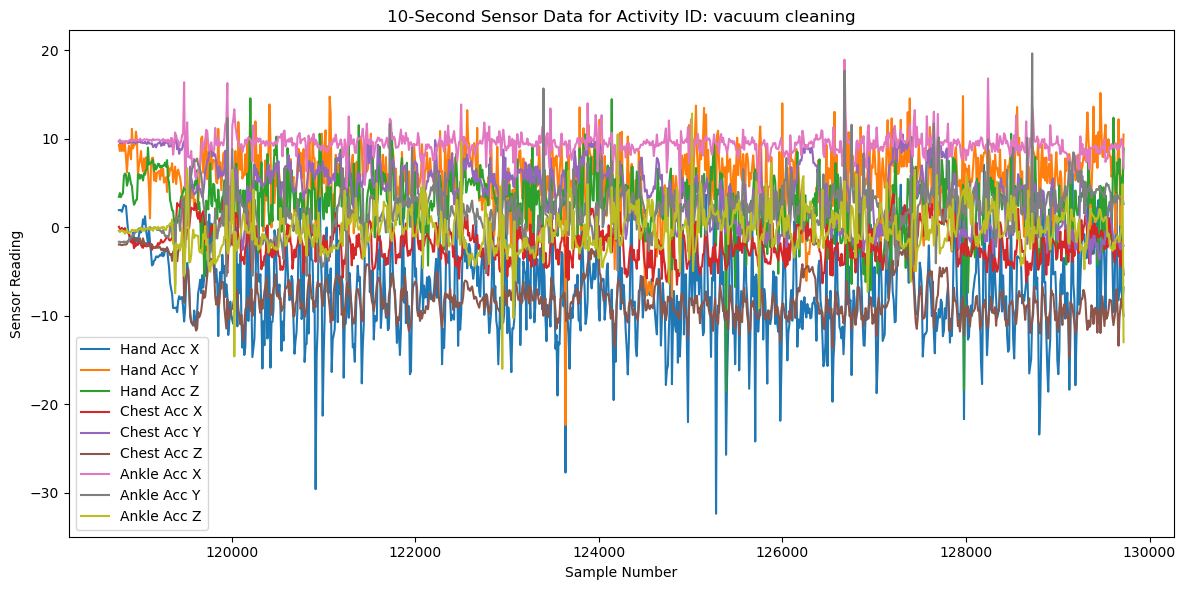

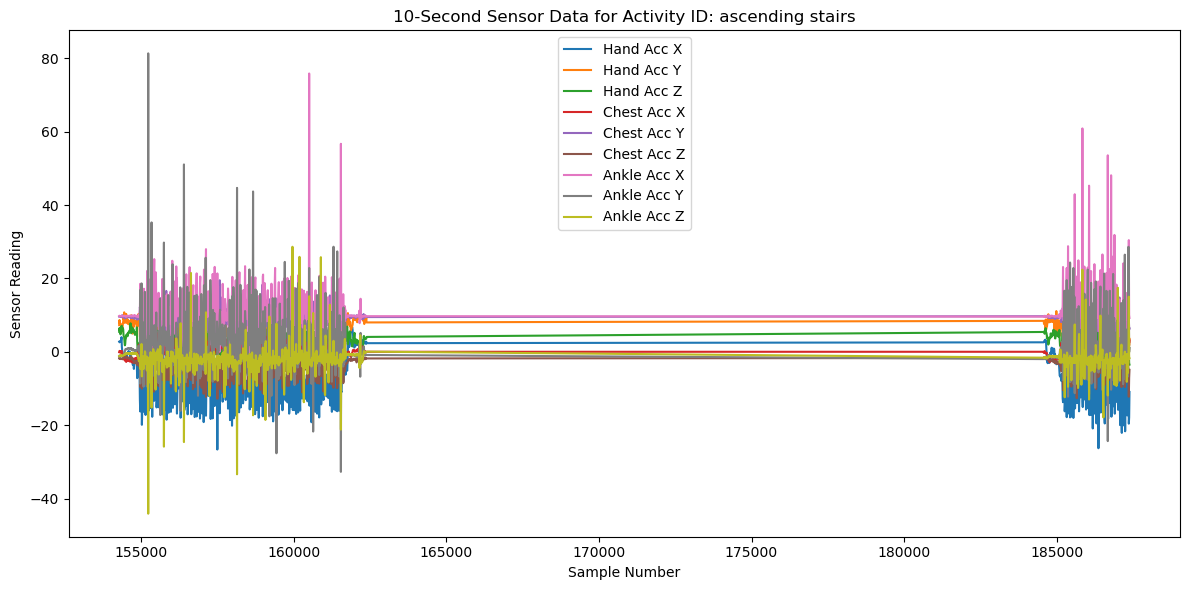

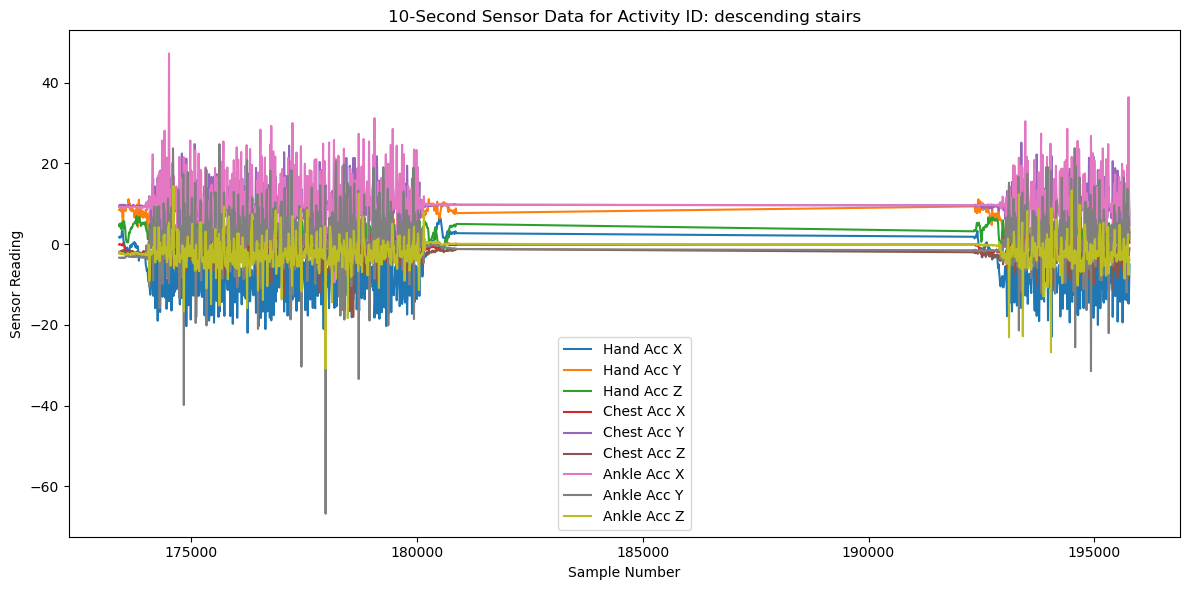

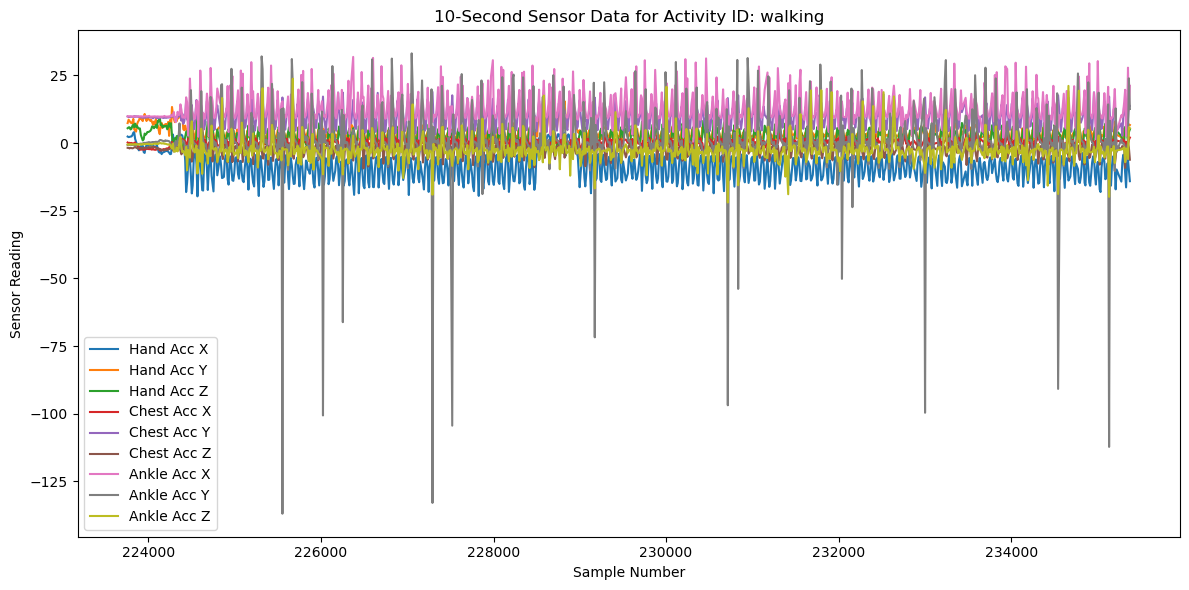

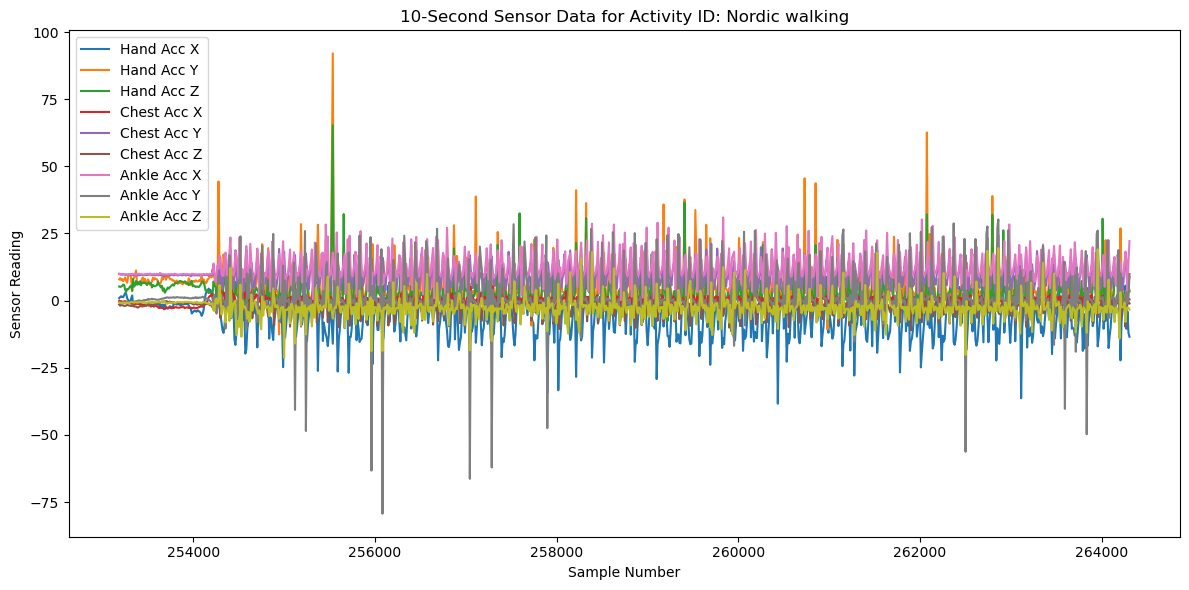

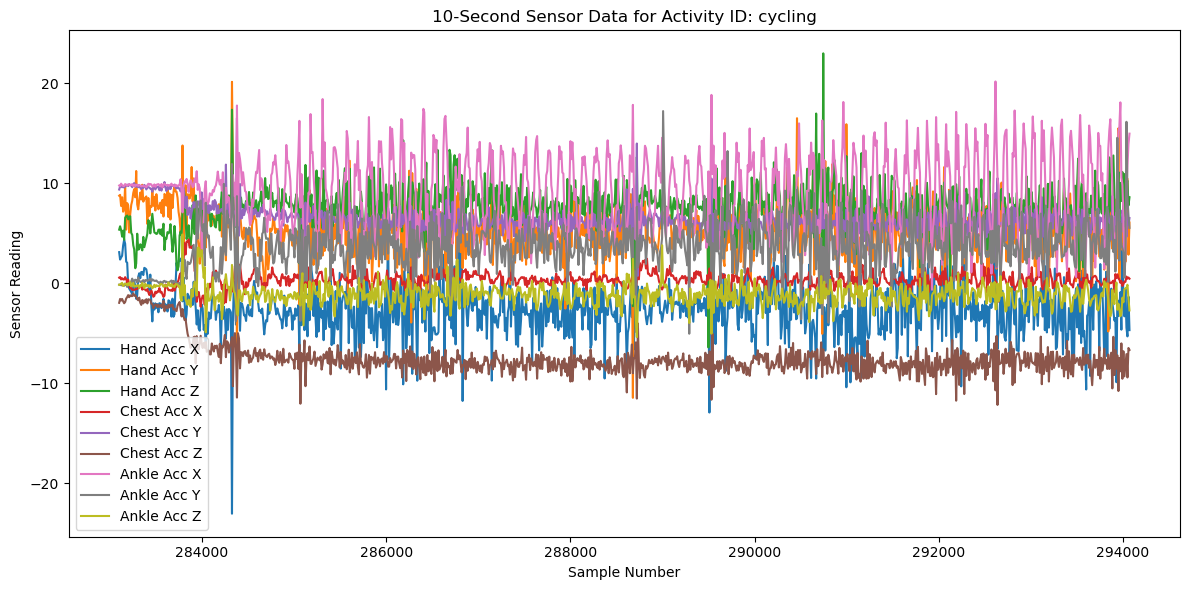

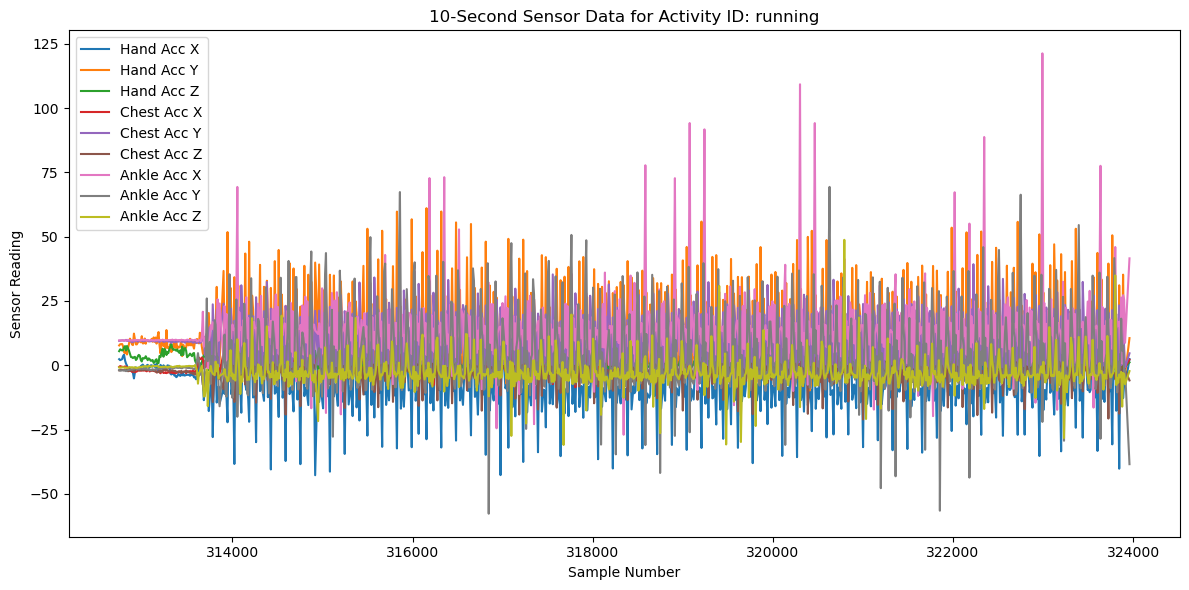

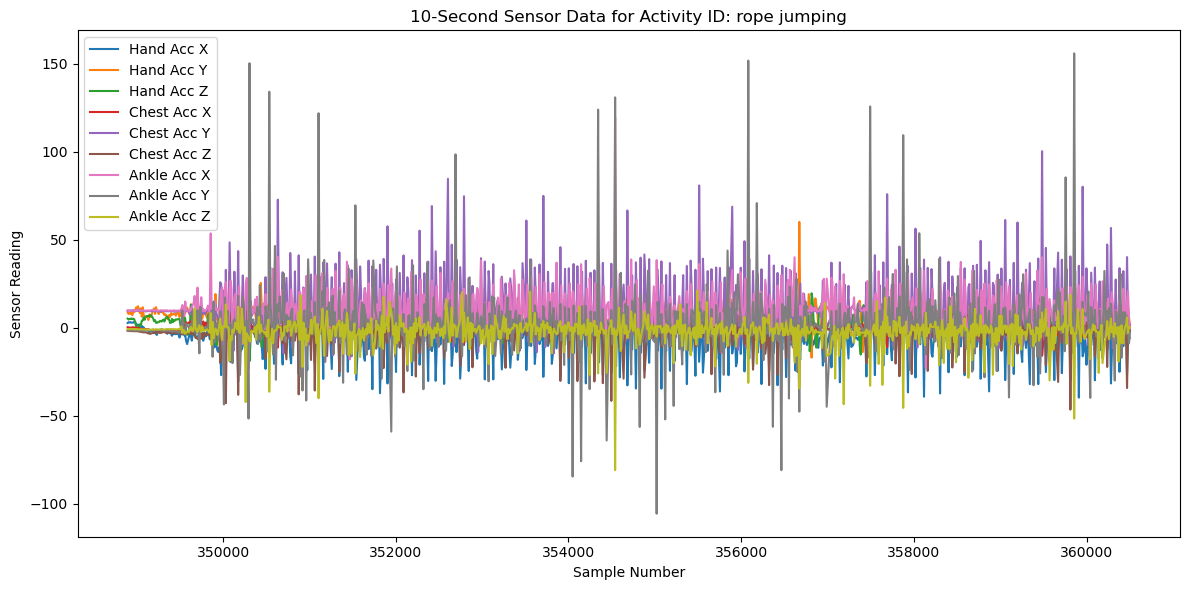

In [20]:
#  Define the sampling frequency and the number of samples for 10 seconds
sampling_frequency = 100  # Assume 100 Hz sampling frequency
window_duration = 10  # seconds
samples_per_window = sampling_frequency * window_duration

# Defining the activities to plot
activities_to_plot = data['activity_name'].unique()

# Plotting the activities for first 10 seconds
for activity in activities_to_plot:
    # Filter the data for the current activity
    activity_data = data[data['activity_name'] == activity]
    
    # Select the first 10 seconds of data.
    activity_data_window = activity_data.iloc[:samples_per_window]
    
    # Plotting the sensor readings over the 10-second window
    plt.figure(figsize=(12, 6))
    plt.plot(activity_data_window['hand_acceleration_16g_x'], label='Hand Acc X')
    plt.plot(activity_data_window['hand_acceleration_16g_y'], label='Hand Acc Y')
    plt.plot(activity_data_window['hand_acceleration_16g_z'], label='Hand Acc Z')
    plt.plot(activity_data_window['chest_acceleration_16g_x'], label='Chest Acc X')
    plt.plot(activity_data_window['chest_acceleration_16g_y'], label='Chest Acc Y')
    plt.plot(activity_data_window['chest_acceleration_16g_z'], label='Chest Acc Z')
    plt.plot(activity_data_window['ankle_acceleration_16g_x'], label='Ankle Acc X')
    plt.plot(activity_data_window['ankle_acceleration_16g_y'], label='Ankle Acc Y')
    plt.plot(activity_data_window['ankle_acceleration_16g_z'], label='Ankle Acc Z')
    plt.title(f'10-Second Sensor Data for Activity ID: {activity}')
    plt.xlabel('Sample Number')
    plt.ylabel('Sensor Reading')
    plt.legend()
    plt.tight_layout()
    plt.show()

# We can observe from the graph that there is too much data for activities like ironing, lying, standing. While for running, cycling there is less data.

In [21]:
data = data.drop(columns=['timestamp'])

In [22]:
data

,activity_id,heart_rate,hand_temperature,hand_acceleration_16g_x,hand_acceleration_16g_y,hand_acceleration_16g_z,hand_acceleration_6g_x,hand_acceleration_6g_y,hand_acceleration_6g_z,hand_gyroscope_x,...,ankle_gyroscope_y,ankle_gyroscope_z,ankle_magnetometer_x,ankle_magnetometer_y,ankle_magnetometer_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4,activity_name
2932,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,...,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1.000000,0.000000,0.000000,0.000000,lying
2943,1,100.0,30.375,2.24615,7.48180,5.55219,2.25130,7.40595,5.65313,-0.431227,...,-0.017912,0.015243,-60.7820,-36.211600,-58.489100,1.000000,0.000000,0.000000,0.000000,lying
2954,1,100.0,30.375,2.30000,7.10681,6.09309,2.34613,7.46611,6.12103,0.075692,...,-0.011798,0.011387,-61.4531,-36.298300,-58.484500,1.000000,0.000000,0.000000,0.000000,lying
2965,1,100.0,30.375,2.49455,7.52335,6.17157,2.59106,7.76653,6.27112,-0.259058,...,-0.009233,0.005823,-62.0065,-36.721700,-58.360800,1.000000,0.000000,0.000000,0.000000,lying
2976,1,101.0,30.375,2.71654,8.30596,4.78671,2.59596,7.94641,4.86635,0.377115,...,-0.042562,-0.009289,-60.4311,-37.541200,-59.001300,1.000000,0.000000,0.000000,0.000000,lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871975,24,162.0,25.125,4.78601,6.75444,7.05521,4.71052,6.72462,6.64876,-0.092524,...,0.020064,-0.022287,-46.0304,-1.464080,-0.453931,0.522578,-0.295758,0.700086,-0.386418,rope jumping
2871986,24,162.0,25.125,4.34732,6.90337,6.35537,4.39582,6.96850,6.61834,-0.303158,...,-0.004692,0.009044,-45.5269,-0.843791,0.114449,0.522768,-0.293886,0.701447,-0.385119,rope jumping
2871997,24,162.0,25.125,4.70704,6.59291,5.89995,4.70308,6.48243,5.99996,0.064261,...,-0.020501,-0.036864,-45.6476,-1.094840,0.256148,0.522624,-0.294082,0.703224,-0.381912,rope jumping
2872007,24,162.0,25.125,4.81452,6.51482,5.74788,4.89736,6.49594,5.78832,-0.191101,...,-0.011895,-0.017897,-45.9167,-0.437698,0.254439,0.523382,-0.292121,0.704582,-0.379869,rope jumping


In [23]:
# Normalise the readings
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [24]:
# Split the dataset into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42, stratify=Y)


In [25]:
# Initialize a dictionary to store the accuracy scores
accuracy_scores = {
    "Sampling Technique": [],
    "Random Forest": [],
    "LightGBM": [],
    "Deep Learning": []
}

In [26]:
# Function to update the accuracy scores dictionary
def update_accuracy_scores(technique, rf_acc, lgb_acc, dl_acc):
    accuracy_scores["Sampling Technique"].append(technique)
    accuracy_scores["Random Forest"].append(rf_acc)
    accuracy_scores["LightGBM"].append(lgb_acc)
    accuracy_scores["Deep Learning"].append(dl_acc)

In [27]:
# Function to evaluate how different models are performing
def evaluate_model(X_train, y_train, X_test, y_test, model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    
    # ROC-AUC Score
    roc_auc = None
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(df_report)
    print(f"Accuracy: {accuracy}")
    print(f"ROC-AUC Score: {roc_auc}")
    
    return accuracy, roc_auc

In [59]:
# # # Initial exploration with Randomized Search CV
# # Define the parameter grid for RandomizedSearchCV
# param_dist = {
#     'n_estimators': np.arange(100, 1000, 100),
#     'max_depth': np.arange(10, 100, 10),
#     'min_samples_split': np.arange(2, 20, 2),
#     'min_samples_leaf': np.arange(1, 10, 1),
#     'bootstrap': [True, False]
# }

# # Instantiate the Random Forest classifier
# rf = RandomForestClassifier(random_state=42)

# # Perform RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
#                                    n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# # Fit the random search model
# random_search.fit(X_train, y_train)

# # Print the best parameters from RandomizedSearchCV
# print(f"Best parameters from RandomizedSearchCV: {random_search.best_params_}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=800; total time=23.9min
[CV] END bootstrap=False, max_depth=80, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=15.2min
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=8, min_samples_split=16, n_estimators=200; total time= 5.5min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=6, min_samples_split=14, n_estimators=800; total time= 9.8min
[CV] END bootstrap=True, max_depth=70, min_samples_leaf=1, min_samples_split=12, n_estimators=800; total time=17.2min
[CV] END bootstrap=False, max_depth=70, min_samples_leaf=3, min_samples_split=4, n_estimators=600; total time=18.5min
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=4, min_samples_split=10, n_estimators=900; total time=25.6min
[CV] END bootstrap=False, max_depth=80, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time

In [190]:
# # Performing Hyperparameter Tuning for Random Forest
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Initialize the RandomForestClassifier
# rf = RandomForestClassifier(random_state=42)

# # Perform GridSearchCV
# grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
#                               cv=3, n_jobs=-1, verbose=2, scoring='accuracy')


In [191]:
# # Performing Hyperparameter Tuning for Light GBM

# # Define the parameter grid for LightGBM
# param_grid_lgb = {
#     'num_leaves': [31, 50, 100],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 200, 300],
#     'min_child_samples': [10, 20, 30],
#     'boosting_type': ['gbdt', 'dart'],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# # Initialize the LightGBMClassifier
# lgb_clf = lgb.LGBMClassifier(random_state=42)

# # Perform GridSearchCV
# grid_search_lgb = GridSearchCV(estimator=lgb_clf, param_grid=param_grid_lgb, 
#                                cv=3, n_jobs=-1, verbose=2, scoring='accuracy')



In [28]:
# Applying Sampling Techniques and Evaluating Models

# Original Data
print("Evaluating on Original Data:")
rf_original_accuracy, rf_original_roc_auc = evaluate_model(X_train, y_train, X_test, y_test, RandomForestClassifier(random_state=42) , "Random Forest")
lgb_original_accuracy, lgb_original_roc_auc = evaluate_model(X_train, y_train, X_test, y_test, lgb.LGBMClassifier(random_state=42)  , "LightGBM")


Evaluating on Original Data:

Random Forest Performance:
              precision    recall  f1-score       support
1              1.000000  0.999716  0.999858   3515.000000
2              0.999407  0.997927  0.998666   3376.000000
3              0.997106  0.998551  0.997828   3451.000000
4              0.996908  0.998095  0.997501   4200.000000
5              0.999422  0.998269  0.998845   1733.000000
6              0.999665  0.998326  0.998995   2987.000000
7              0.998519  0.999407  0.998963   3372.000000
12             0.988345  0.990654  0.989498   2140.000000
13             0.993169  0.985915  0.989529   1917.000000
16             0.995637  0.998750  0.997191   3199.000000
17             0.998617  0.998617  0.998617   4339.000000
24             1.000000  0.997704  0.998851    871.000000
accuracy       0.997436  0.997436  0.997436      0.997436
macro avg      0.997233  0.996828  0.997029  35100.000000
weighted avg   0.997437  0.997436  0.997435  35100.000000
Accuracy: 0.997

In [29]:
# Determine the number of unique classes
num_classes = len(np.unique(y_train))

In [30]:
# Performing label encoding for the labels since our labels are not sequential.
# Encode the labels to start from 0
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Verify the mapping
print("Classes:", label_encoder.classes_)


Classes: [ 1  2  3  4  5  6  7 12 13 16 17 24]


In [31]:
# deep learning model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [32]:
# Reshape the data to fit the CNN input requirements
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [33]:
cnn_model = create_cnn_model(X_train_cnn.shape[1:], num_classes)

In [45]:
# Code for early stopping 
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation data
history = cnn_model.fit(X_train_cnn, y_train_encoded, epochs=50, batch_size=64,
                    validation_data=(X_test_cnn, y_test_encoded),
                    callbacks=[early_stopping], verbose=2)


Epoch 1/50
2194/2194 - 12s - 5ms/step - accuracy: 0.9888 - loss: 0.0325 - val_accuracy: 0.9868 - val_loss: 0.0497
Epoch 2/50
2194/2194 - 11s - 5ms/step - accuracy: 0.9890 - loss: 0.0337 - val_accuracy: 0.9840 - val_loss: 0.0621
Epoch 3/50
2194/2194 - 11s - 5ms/step - accuracy: 0.9892 - loss: 0.0321 - val_accuracy: 0.9854 - val_loss: 0.0540
Epoch 4/50
2194/2194 - 11s - 5ms/step - accuracy: 0.9899 - loss: 0.0294 - val_accuracy: 0.9868 - val_loss: 0.0524
Epoch 5/50
2194/2194 - 11s - 5ms/step - accuracy: 0.9894 - loss: 0.0326 - val_accuracy: 0.9863 - val_loss: 0.0527
Epoch 6/50
2194/2194 - 11s - 5ms/step - accuracy: 0.9896 - loss: 0.0307 - val_accuracy: 0.9866 - val_loss: 0.0527
Epoch 7/50
2194/2194 - 11s - 5ms/step - accuracy: 0.9899 - loss: 0.0299 - val_accuracy: 0.9856 - val_loss: 0.0554
Epoch 8/50
2194/2194 - 11s - 5ms/step - accuracy: 0.9905 - loss: 0.0283 - val_accuracy: 0.9864 - val_loss: 0.0620
Epoch 9/50
2194/2194 - 12s - 5ms/step - accuracy: 0.9902 - loss: 0.0293 - val_accuracy: 

In [46]:
# Plotting the accuracy and loss curves
def plot_training_curves(history):
    # Accuracy Curves
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Curves
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

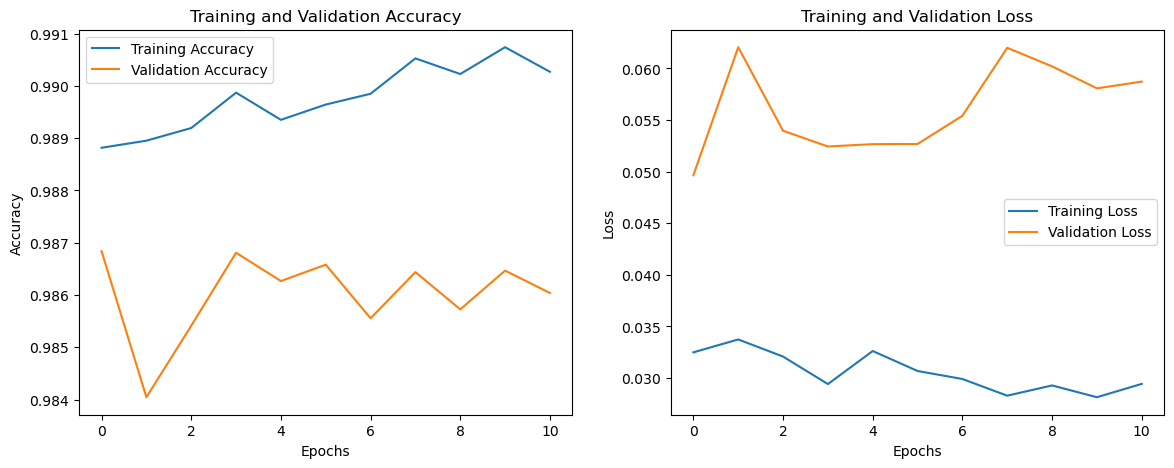

In [47]:
# Call the function to plot the curves
plot_training_curves(history)

In [48]:
# Note to be added : Potential Underfitting or Model Complexity Issues: The fact that the validation accuracy is lower than the training accuracy and the validation loss is higher than the training loss might suggest that the model could either be underfitting or that it's not complex enough to capture the underlying patterns in the data.
# No Significant Overfitting: Since the gap between the training and validation curves is not very large, there doesn’t seem to be significant overfitting, but the model's generalization to the validation set is not improving consistently.
# Actionable Steps: To improve the model's performance, you could consider tuning hyperparameters, using more complex models, increasing the amount of training data, or employing regularization techniques. Additionally, evaluating the data preprocessing steps, such as normalization and handling of class imbalance, could help in improving the model’s ability to generalize.

In [49]:
# CNN on Original Data
print("\nEvaluating CNN Model on Original Data:")
#cnn_model = create_cnn_model(X_train_cnn.shape[1:], num_classes)
#cnn_model.fit(X_train_cnn, y_train_encoded, epochs=10, batch_size=64, verbose=0)
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_encoded, verbose=0)
print(f"CNN Model Accuracy: {cnn_accuracy}")


Evaluating CNN Model on Original Data:
CNN Model Accuracy: 0.98683762550354


In [50]:
# Original Data
update_accuracy_scores("Original Data", rf_original_accuracy, lgb_original_accuracy, cnn_accuracy)


In [51]:
# SMOTE (Oversampling)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("\nEvaluating after SMOTE Oversampling:")
rf_smote_accuracy, rf_smote_roc_auc = evaluate_model(X_train_smote, y_train_smote, X_test, y_test, RandomForestClassifier(random_state=42), "Random Forest with SMOTE")
lgb_smote_accuracy, lgb_smote_roc_auc = evaluate_model(X_train_smote, y_train_smote, X_test, y_test, lgb.LGBMClassifier(random_state=42), "LightGBM with SMOTE")



Evaluating after SMOTE Oversampling:

Random Forest with SMOTE Performance:
              precision    recall  f1-score       support
1              1.000000  0.998862  0.999431   3515.000000
2              0.998814  0.997927  0.998370   3376.000000
3              0.997101  0.996523  0.996812   3451.000000
4              1.000000  0.997857  0.998927   4200.000000
5              0.999423  0.998846  0.999134   1733.000000
6              0.998995  0.997991  0.998493   2987.000000
7              0.998224  1.000000  0.999111   3372.000000
12             0.990205  0.992056  0.991130   2140.000000
13             0.990109  0.992175  0.991141   1917.000000
16             0.995945  0.998124  0.997034   3199.000000
17             0.997697  0.998387  0.998042   4339.000000
24             1.000000  0.997704  0.998851    871.000000
accuracy       0.997521  0.997521  0.997521      0.997521
macro avg      0.997209  0.997204  0.997206  35100.000000
weighted avg   0.997525  0.997521  0.997522  35100.00

In [52]:
# Reshape the data to fit the CNN input requirements
X_train_cnn_smote = X_train_smote.reshape(X_train_smote.shape[0], X_train_smote.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [53]:
# Performing label encoding for the labels since our labels are not sequential.
# Encode the labels to start from 0
label_encoder = LabelEncoder()
y_train_smote_encoded = label_encoder.fit_transform(y_train_smote)
y_test_encoded = label_encoder.transform(y_test)

# Verify the mapping
print("Classes:", label_encoder.classes_)

Classes: [ 1  2  3  4  5  6  7 12 13 16 17 24]


In [54]:
cnn_model_smote = create_cnn_model(X_train_cnn_smote.shape[1:], num_classes)

In [55]:
# early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation data
history_smote = cnn_model_smote.fit(X_train_cnn_smote, y_train_smote_encoded, epochs=50, batch_size=64,
                    validation_data=(X_test_cnn, y_test_encoded),
                    callbacks=[early_stopping], verbose=2)


Epoch 1/50
3255/3255 - 16s - 5ms/step - accuracy: 0.8663 - loss: 0.4194 - val_accuracy: 0.9459 - val_loss: 0.1700
Epoch 2/50
3255/3255 - 16s - 5ms/step - accuracy: 0.9484 - loss: 0.1588 - val_accuracy: 0.9661 - val_loss: 0.1025
Epoch 3/50
3255/3255 - 16s - 5ms/step - accuracy: 0.9624 - loss: 0.1156 - val_accuracy: 0.9713 - val_loss: 0.0885
Epoch 4/50
3255/3255 - 16s - 5ms/step - accuracy: 0.9688 - loss: 0.0945 - val_accuracy: 0.9749 - val_loss: 0.0789
Epoch 5/50
3255/3255 - 15s - 5ms/step - accuracy: 0.9737 - loss: 0.0784 - val_accuracy: 0.9779 - val_loss: 0.0696
Epoch 6/50
3255/3255 - 16s - 5ms/step - accuracy: 0.9773 - loss: 0.0694 - val_accuracy: 0.9763 - val_loss: 0.0797
Epoch 7/50
3255/3255 - 16s - 5ms/step - accuracy: 0.9788 - loss: 0.0640 - val_accuracy: 0.9807 - val_loss: 0.0649
Epoch 8/50
3255/3255 - 16s - 5ms/step - accuracy: 0.9806 - loss: 0.0578 - val_accuracy: 0.9801 - val_loss: 0.0659
Epoch 9/50
3255/3255 - 16s - 5ms/step - accuracy: 0.9818 - loss: 0.0541 - val_accuracy: 

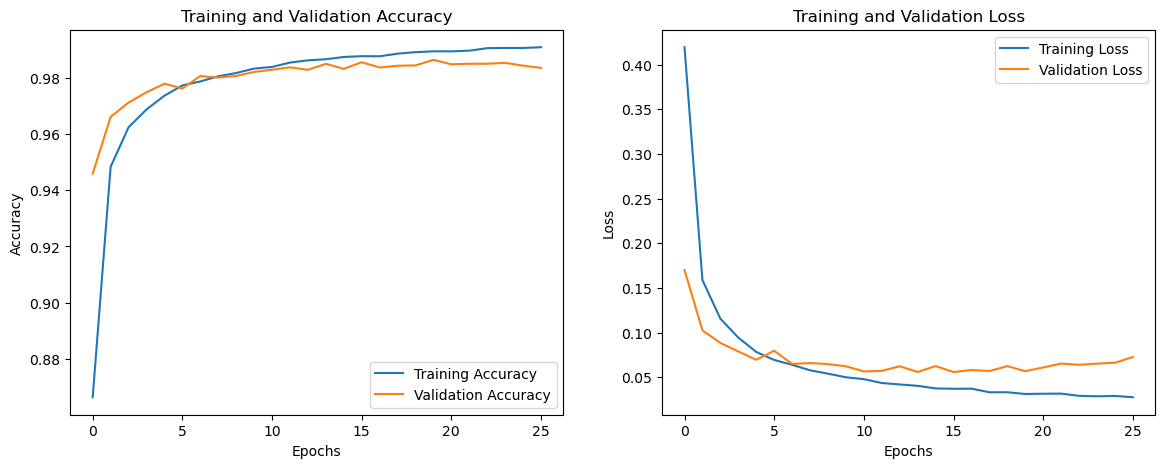

In [56]:
plot_training_curves(history_smote)

In [57]:
# deep learning model
# CNN on SMOTE-oversampled Data
print("\nEvaluating CNN Model on SMOTE Data:")
#cnn_model_smote.fit(X_train_cnn_smote, y_train_smote_encoded, epochs=10, batch_size=64, verbose=0)
cnn_smote_loss, cnn_smote_accuracy = cnn_model_smote.evaluate(X_test_cnn, y_test_encoded, verbose=0)
print(f"CNN Model Accuracy with SMOTE: {cnn_smote_accuracy}")


Evaluating CNN Model on SMOTE Data:
CNN Model Accuracy with SMOTE: 0.9856125116348267


In [58]:
# SMOTE (Oversampling)
update_accuracy_scores("SMOTE", rf_smote_accuracy, lgb_smote_accuracy, cnn_smote_accuracy)

In [59]:
#Performing Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print("\nEvaluating after Random Undersampling:")
rf_rus_accuracy, rf_rus_roc_auc = evaluate_model(X_train_rus, y_train_rus, X_test, y_test, RandomForestClassifier(random_state=42), "Random Forest with Random Undersampling")
lgb_rus_accuracy, lgb_rus_roc_auc = evaluate_model(X_train_rus, y_train_rus, X_test, y_test, lgb.LGBMClassifier(random_state=42), "LightGBM with Random Undersampling")



Evaluating after Random Undersampling:

Random Forest with Random Undersampling Performance:
              precision    recall  f1-score       support
1              1.000000  0.994595  0.997290   3515.000000
2              0.995528  0.989040  0.992273   3376.000000
3              0.985014  0.990438  0.987719   3451.000000
4              0.997375  0.995000  0.996186   4200.000000
5              0.998843  0.995961  0.997400   1733.000000
6              0.997649  0.994309  0.995976   2987.000000
7              0.997630  0.998814  0.998222   3372.000000
12             0.972235  0.981776  0.976982   2140.000000
13             0.974532  0.978091  0.976308   1917.000000
16             0.985408  0.992185  0.988785   3199.000000
17             0.992617  0.991473  0.992044   4339.000000
24             1.000000  0.997704  0.998851    871.000000
accuracy       0.991937  0.991937  0.991937      0.991937
macro avg      0.991403  0.991615  0.991503  35100.000000
weighted avg   0.991971  0.991937  0

In [60]:
# Reshape the data to fit the CNN input requirements
X_train_cnn_rus = X_train_rus.reshape(X_train_rus.shape[0], X_train_rus.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [61]:
# Performing label encoding for the labels since our labels are not sequential.
# Encode the labels to start from 0
label_encoder = LabelEncoder()
y_train_rus_encoded = label_encoder.fit_transform(y_train_rus)
y_test_encoded = label_encoder.transform(y_test)

# Verify the mapping
print("Classes:", label_encoder.classes_)

Classes: [ 1  2  3  4  5  6  7 12 13 16 17 24]


In [62]:
cnn_model_rus = create_cnn_model(X_train_cnn_rus.shape[1:], num_classes)

In [63]:
# Train the model with validation data
history_rus = cnn_model_rus.fit(X_train_cnn_rus, y_train_rus_encoded, epochs=50, batch_size=64,
                    validation_data=(X_test_cnn, y_test_encoded),
                    callbacks=[early_stopping], verbose=2)


Epoch 1/50
654/654 - 5s - 7ms/step - accuracy: 0.7051 - loss: 0.9181 - val_accuracy: 0.8772 - val_loss: 0.3939
Epoch 2/50
654/654 - 4s - 7ms/step - accuracy: 0.8656 - loss: 0.4149 - val_accuracy: 0.9188 - val_loss: 0.2476
Epoch 3/50
654/654 - 4s - 7ms/step - accuracy: 0.9006 - loss: 0.3013 - val_accuracy: 0.9337 - val_loss: 0.1996
Epoch 4/50
654/654 - 4s - 6ms/step - accuracy: 0.9199 - loss: 0.2422 - val_accuracy: 0.9419 - val_loss: 0.1734
Epoch 5/50
654/654 - 4s - 6ms/step - accuracy: 0.9333 - loss: 0.2035 - val_accuracy: 0.9504 - val_loss: 0.1539
Epoch 6/50
654/654 - 4s - 6ms/step - accuracy: 0.9420 - loss: 0.1748 - val_accuracy: 0.9566 - val_loss: 0.1373
Epoch 7/50
654/654 - 4s - 6ms/step - accuracy: 0.9508 - loss: 0.1480 - val_accuracy: 0.9595 - val_loss: 0.1294
Epoch 8/50
654/654 - 4s - 6ms/step - accuracy: 0.9537 - loss: 0.1386 - val_accuracy: 0.9605 - val_loss: 0.1277
Epoch 9/50
654/654 - 4s - 6ms/step - accuracy: 0.9580 - loss: 0.1218 - val_accuracy: 0.9624 - val_loss: 0.1258
E

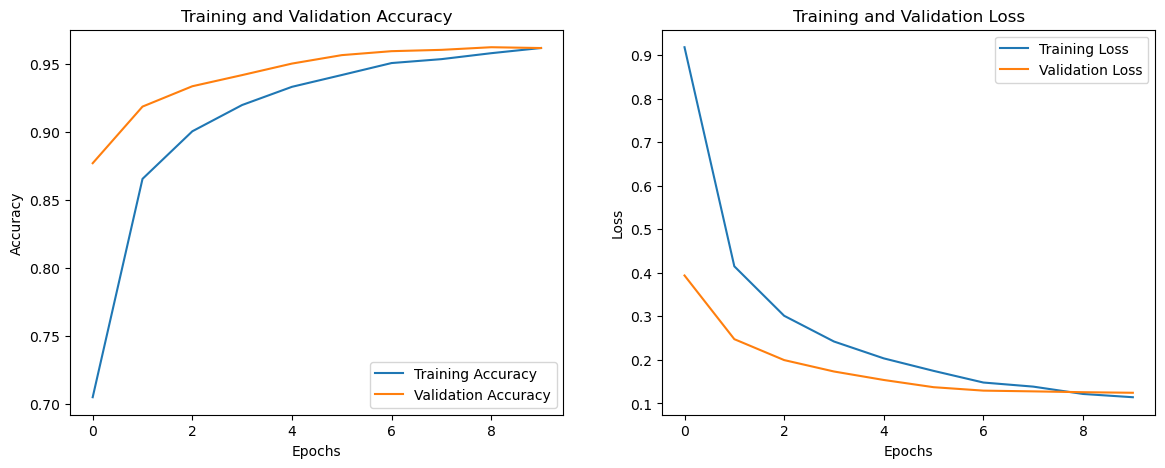

In [64]:
plot_training_curves(history_rus)

In [65]:
# deep learning model
# CNN on Random Undersampled Data
print("\nEvaluating CNN Model on Random Undersampled Data:")
#cnn_model_rus = create_cnn_model(X_train_cnn_rus.shape[1:], num_classes)
#cnn_model_rus.fit(X_train_cnn_rus, y_train_rus_encoded, epochs=10, batch_size=64, verbose=0)
cnn_rus_loss, cnn_rus_accuracy = cnn_model_rus.evaluate(X_test_cnn, y_test_encoded, verbose=0)
print(f"CNN Model Accuracy with Random Undersampling: {cnn_rus_accuracy}")


Evaluating CNN Model on Random Undersampled Data:
CNN Model Accuracy with Random Undersampling: 0.8771510124206543


In [66]:
# Random Undersampling
update_accuracy_scores("Random Undersampling", rf_rus_accuracy, lgb_rus_accuracy, cnn_rus_accuracy)

In [67]:
# Hybrid Sampling Technique (SMOTEENN)
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)
print("\nEvaluating after SMOTEENN (Hybrid Sampling):")
rf_smoteenn_accuracy, rf_smoteenn_roc_auc = evaluate_model(X_train_smoteenn, y_train_smoteenn, X_test, y_test, RandomForestClassifier(random_state=42), "Random Forest with SMOTEENN")
lgb_smoteenn_accuracy, lgb_smoteenn_roc_auc = evaluate_model(X_train_smoteenn, y_train_smoteenn, X_test, y_test, lgb.LGBMClassifier(random_state=42), "LightGBM with SMOTEENN")



Evaluating after SMOTEENN (Hybrid Sampling):

Random Forest with SMOTEENN Performance:
              precision    recall  f1-score       support
1              1.000000  0.997724  0.998861   3515.000000
2              0.998217  0.995261  0.996737   3376.000000
3              0.990775  0.995943  0.993353   3451.000000
4              1.000000  0.995476  0.997733   4200.000000
5              0.999422  0.997692  0.998556   1733.000000
6              0.998995  0.997991  0.998493   2987.000000
7              0.997338  1.000000  0.998667   3372.000000
12             0.986034  0.989720  0.987873   2140.000000
13             0.985981  0.990610  0.988290   1917.000000
16             0.994694  0.996249  0.995471   3199.000000
17             0.996078  0.994930  0.995503   4339.000000
24             1.000000  0.998852  0.999426    871.000000
accuracy       0.995954  0.995954  0.995954      0.995954
macro avg      0.995628  0.995871  0.995747  35100.000000
weighted avg   0.995966  0.995954  0.99595

In [68]:
# Reshape the data to fit the CNN input requirements
X_train_cnn_smoteenn = X_train_smoteenn.reshape(X_train_smoteenn.shape[0], X_train_smoteenn.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [69]:
# Performing label encoding for the labels since our labels are not sequential.
# Encode the labels to start from 0
label_encoder = LabelEncoder()
y_train_smoteenn_encoded = label_encoder.fit_transform(y_train_smoteenn)
y_test_encoded = label_encoder.transform(y_test)

# Verify the mapping
print("Classes:", label_encoder.classes_)

Classes: [ 1  2  3  4  5  6  7 12 13 16 17 24]


In [70]:
cnn_model_smoteenn = create_cnn_model(X_train_cnn_smoteenn.shape[1:], num_classes)

In [71]:
# Train the model with validation data
history_smoteenn = cnn_model_smoteenn.fit(X_train_cnn_smoteenn, y_train_smoteenn_encoded, epochs=50, batch_size=64,
                    validation_data=(X_test_cnn, y_test_encoded),
                    callbacks=[early_stopping], verbose=2)

Epoch 1/50
3199/3199 - 16s - 5ms/step - accuracy: 0.8752 - loss: 0.3883 - val_accuracy: 0.9487 - val_loss: 0.1643
Epoch 2/50
3199/3199 - 16s - 5ms/step - accuracy: 0.9547 - loss: 0.1409 - val_accuracy: 0.9628 - val_loss: 0.1232
Epoch 3/50
3199/3199 - 16s - 5ms/step - accuracy: 0.9676 - loss: 0.1010 - val_accuracy: 0.9684 - val_loss: 0.1056
Epoch 4/50
3199/3199 - 16s - 5ms/step - accuracy: 0.9736 - loss: 0.0808 - val_accuracy: 0.9746 - val_loss: 0.0949
Epoch 5/50
3199/3199 - 16s - 5ms/step - accuracy: 0.9775 - loss: 0.0693 - val_accuracy: 0.9739 - val_loss: 0.0889
Epoch 6/50
3199/3199 - 16s - 5ms/step - accuracy: 0.9805 - loss: 0.0592 - val_accuracy: 0.9772 - val_loss: 0.0804
Epoch 7/50
3199/3199 - 16s - 5ms/step - accuracy: 0.9826 - loss: 0.0533 - val_accuracy: 0.9778 - val_loss: 0.0835
Epoch 8/50
3199/3199 - 16s - 5ms/step - accuracy: 0.9837 - loss: 0.0495 - val_accuracy: 0.9779 - val_loss: 0.0867
Epoch 9/50
3199/3199 - 16s - 5ms/step - accuracy: 0.9854 - loss: 0.0439 - val_accuracy: 

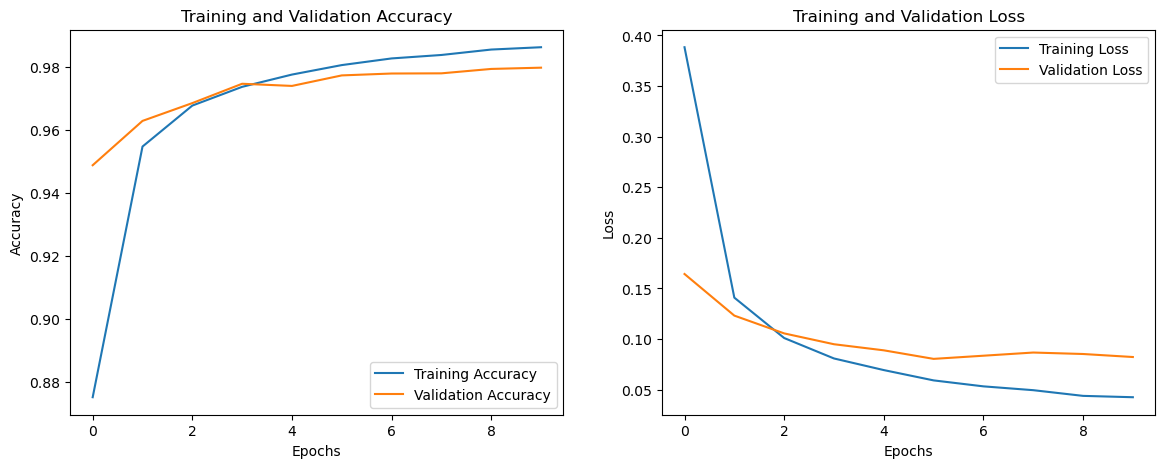

In [72]:
plot_training_curves(history_smoteenn)

In [73]:
# deep learning model
# CNN on SMOTEENN Data
print("\nEvaluating CNN Model on SMOTEENN Data:")
#cnn_model_smoteenn = create_cnn_model(X_train_cnn_smoteenn.shape[1:], num_classes)
#cnn_model_smoteenn.fit(X_train_cnn_smoteenn, y_train_smoteenn_encoded, epochs=10, batch_size=64, verbose=0)
cnn_smoteenn_loss, cnn_smoteenn_accuracy = cnn_model_smoteenn.evaluate(X_test_cnn, y_test_encoded, verbose=0)
print(f"CNN Model Accuracy with SMOTEENN: {cnn_smoteenn_accuracy}")


Evaluating CNN Model on SMOTEENN Data:
CNN Model Accuracy with SMOTEENN: 0.9487464427947998


In [74]:
# SMOTEENN (Hybrid Sampling)
update_accuracy_scores("SMOTEENN", rf_smoteenn_accuracy, lgb_smoteenn_accuracy, cnn_smoteenn_accuracy)


In [75]:
# Hybrid Sampling Technique (SMOTETomek)
smotetomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)
print("\nEvaluating after SMOTETomek (Hybrid Sampling):")
rf_smotetomek_accuracy, rf_smotetomek_roc_auc = evaluate_model(X_train_smotetomek, y_train_smotetomek, X_test, y_test, RandomForestClassifier(random_state=42), "Random Forest with SMOTETomek")
lgb_smotetomek_accuracy, lgb_smotetomek_roc_auc = evaluate_model(X_train_smotetomek, y_train_smotetomek, X_test, y_test, lgb.LGBMClassifier(random_state=42), "LightGBM with SMOTETomek")



Evaluating after SMOTETomek (Hybrid Sampling):

Random Forest with SMOTETomek Performance:
              precision    recall  f1-score       support
1              1.000000  0.999431  0.999715   3515.000000
2              0.999110  0.997630  0.998370   3376.000000
3              0.997101  0.996813  0.996957   3451.000000
4              0.999762  0.998333  0.999047   4200.000000
5              1.000000  0.998269  0.999134   1733.000000
6              0.998995  0.997991  0.998493   2987.000000
7              0.998224  1.000000  0.999111   3372.000000
12             0.987477  0.994860  0.991155   2140.000000
13             0.995281  0.990089  0.992678   1917.000000
16             0.996878  0.998124  0.997501   3199.000000
17             0.997008  0.998387  0.997697   4339.000000
24             1.000000  0.997704  0.998851    871.000000
accuracy       0.997664  0.997664  0.997664      0.997664
macro avg      0.997486  0.997303  0.997392  35100.000000
weighted avg   0.997669  0.997664  0.9

In [76]:
# Reshape the data to fit the CNN input requirements
X_train_cnn_smotetomek = X_train_smotetomek.reshape(X_train_smotetomek.shape[0], X_train_smotetomek.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [77]:
# Performing label encoding for the labels since our labels are not sequential.
# Encode the labels to start from 0
label_encoder = LabelEncoder()
y_train_smotetomek_encoded = label_encoder.fit_transform(y_train_smotetomek)
y_test_encoded = label_encoder.transform(y_test)

# Verify the mapping
print("Classes:", label_encoder.classes_)

Classes: [ 1  2  3  4  5  6  7 12 13 16 17 24]


In [78]:
cnn_model_smotetomek = create_cnn_model(X_train_cnn_smotetomek.shape[1:], num_classes)

In [79]:
# Training the model with validation data
history_smotetomek = cnn_model_smotetomek.fit(X_train_cnn_smotetomek, y_train_smotetomek_encoded, epochs=50, batch_size=64,
                    validation_data=(X_test_cnn, y_test_encoded),
                    callbacks=[early_stopping], verbose=2)

Epoch 1/50
3254/3254 - 17s - 5ms/step - accuracy: 0.8703 - loss: 0.4046 - val_accuracy: 0.9531 - val_loss: 0.1442
Epoch 2/50
3254/3254 - 17s - 5ms/step - accuracy: 0.9506 - loss: 0.1531 - val_accuracy: 0.9681 - val_loss: 0.1012
Epoch 3/50
3254/3254 - 17s - 5ms/step - accuracy: 0.9638 - loss: 0.1113 - val_accuracy: 0.9754 - val_loss: 0.0785
Epoch 4/50
3254/3254 - 18s - 6ms/step - accuracy: 0.9711 - loss: 0.0889 - val_accuracy: 0.9742 - val_loss: 0.0793
Epoch 5/50
3254/3254 - 17s - 5ms/step - accuracy: 0.9744 - loss: 0.0769 - val_accuracy: 0.9785 - val_loss: 0.0666
Epoch 6/50
3254/3254 - 18s - 6ms/step - accuracy: 0.9780 - loss: 0.0664 - val_accuracy: 0.9796 - val_loss: 0.0671
Epoch 7/50
3254/3254 - 17s - 5ms/step - accuracy: 0.9803 - loss: 0.0597 - val_accuracy: 0.9796 - val_loss: 0.0661
Epoch 8/50
3254/3254 - 17s - 5ms/step - accuracy: 0.9820 - loss: 0.0544 - val_accuracy: 0.9789 - val_loss: 0.0687
Epoch 9/50
3254/3254 - 18s - 6ms/step - accuracy: 0.9833 - loss: 0.0510 - val_accuracy: 

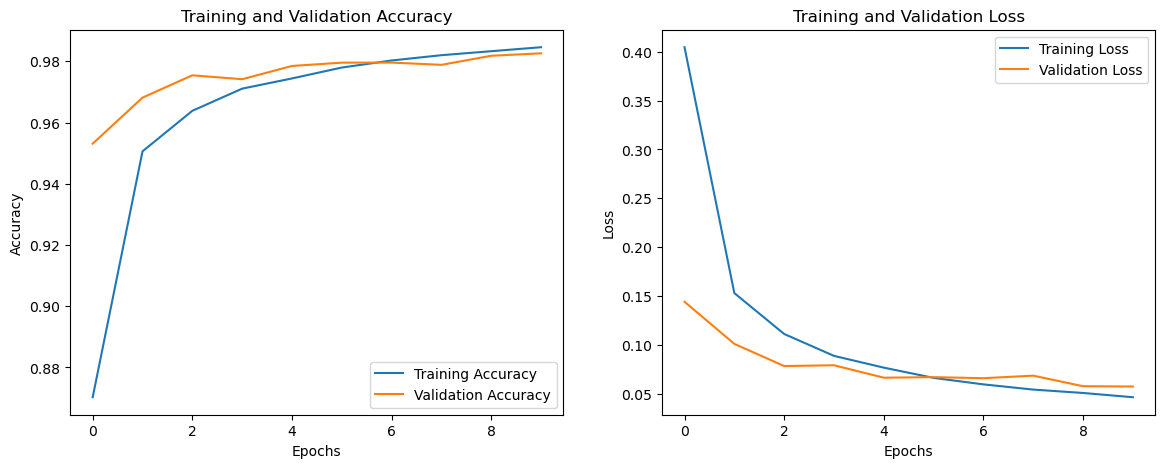

In [80]:
plot_training_curves(history_smotetomek)

In [81]:
# deep learning model
# CNN on SMOTETomek Data
print("\nEvaluating CNN Model on SMOTETomek Data:")
#cnn_model_smotetomek = create_cnn_model(X_train_cnn_smotetomek.shape[1:], num_classes)
#cnn_model_smotetomek.fit(X_train_cnn_smotetomek, y_train_smotetomek_encoded, epochs=10, batch_size=64, verbose=0)
cnn_smotetomek_loss, cnn_smotetomek_accuracy = cnn_model_smotetomek.evaluate(X_test_cnn, y_test_encoded, verbose=0)
print(f"CNN Model Accuracy with SMOTETomek: {cnn_smotetomek_accuracy}")


Evaluating CNN Model on SMOTETomek Data:
CNN Model Accuracy with SMOTETomek: 0.9531053900718689


In [82]:
# Using another hybrid technique SMOTETomek (Hybrid Sampling)
update_accuracy_scores("SMOTETomek", rf_smotetomek_accuracy, lgb_smotetomek_accuracy, cnn_smotetomek_accuracy)

In [83]:
# Create a DataFrame from the accuracy scores dictionary
accuracy_df = pd.DataFrame(accuracy_scores)

# Display the accuracy scores table
print("Accuracy Scores for Each Sampling Technique and Model:")
print(accuracy_df)

Accuracy Scores for Each Sampling Technique and Model:
     Sampling Technique  Random Forest  LightGBM  Deep Learning
0         Original Data       0.997436  0.999658       0.986695
1         Original Data       0.997436  0.999658       0.986838
2                 SMOTE       0.997521  0.999601       0.985613
3  Random Undersampling       0.991937  0.998547       0.877151
4              SMOTEENN       0.995954  0.998974       0.948746
5            SMOTETomek       0.997664  0.999601       0.953105


In [84]:
# Streamlit
# Trying to create the small graph using streamlit
st.title(" :bar_chart: PAMP 2 Dataset Dashboard")
st.markdown('<style>div.block-container{padding-top:1rem;}</style>',unsafe_allow_html=True)
st.write('This dashboard showcases the analysis of the PAMAP2 Physical Activity Monitoring dataset.')


2024-08-30 13:45:31.321 
  command:

    streamlit run /Users/nehadudeja/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [116]:
st.sidebar.header("Choose your filter: ")
# Create for Activity
activity = st.sidebar.multiselect("Pick your Activity", data["activity_name"].unique())
if not activity:
    data2 = data.copy()
else:
    data2 = data[data["activity_name"].isin(activity)]
    


In [117]:
# Filter the data based on Activity
if not activity:
    filter_data = data
else:
    filter_data = data[data["activity_name"].isin(activity)]

In [118]:
# Display the first few rows of the filtered dataset
st.subheader('Sample Data')
st.write(filter_data.head())

In [119]:
# Plot the distribution of activities
st.subheader('Activity Distribution')
activity_counts = filter_data['activity_name'].value_counts()
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x=activity_counts.index, y=activity_counts.values, ax=ax, palette='viridis')
ax.set_title('Distribution of Activities', fontsize=20)
ax.set_xlabel('Activity', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
st.pyplot(fig)

DeltaGenerator()

In [120]:
# Plot the percentage of activities using a pie chart
st.subheader('Activity Distribution Percentage')
activity_percentage = filter_data['activity_name'].value_counts(normalize=True) * 100
fig_pie = px.pie(values=activity_percentage, names=activity_percentage.index)
st.plotly_chart(fig_pie)

DeltaGenerator()